In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import GradientBoostingRegressor,ExtraTreesRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv')

In [3]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


- By observe the dataset there are 158 rows nd 12 columns present. In the dataset 11 columns are feature and 1 column is our target variable. 'Happiness Score' is our target variable.

In [4]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


- Here we extract first five rows of the dataset

In [5]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


- Here we extract last five rows of dataset

# Non Graphical Analysis

In [6]:
df.shape

(158, 12)

- By applying the method to see the total number of rows and columns

In [7]:
print(df['Region'].unique())

['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']


In [8]:
df = df.dropna(how='all')
df.sample(n=2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
42,Guatemala,Latin America and Caribbean,43,6.123,0.05224,0.74553,1.04356,0.64425,0.57733,0.09472,0.27489,2.74255
127,Botswana,Sub-Saharan Africa,128,4.332,0.04934,0.99355,1.10464,0.04776,0.49495,0.12474,0.10461,1.46181


In [9]:
df.dropna(axis=1, how='all')
df.sample(n=2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
129,Georgia,Central and Eastern Europe,130,4.297,0.04221,0.74190,0.38562,0.72926,0.40577,0.38331,0.05547,1.59541
71,Hong Kong,Eastern Asia,72,5.474,0.05051,1.38604,1.05818,1.01328,0.59608,0.37124,0.39478,0.65429


In [10]:
type_of_data = df.dtypes
print('List of DataTypes in Dataset')
print('\n--------------------------')
type_of_data.to_frame('list of Data Type')

List of DataTypes in Dataset

--------------------------


,list of Data Type
Country,object
Region,object
Happiness Rank,int64
Happiness Score,float64
Standard Error,float64
Economy (GDP per Capita),float64
Family,float64
Health (Life Expectancy),float64
Freedom,float64
Trust (Government Corruption),float64


By observe that,

- There are two columns with object data types: Country and Region.
- Happiness Rank is an integer.
- The remaining columns are all floating-point numbers, indicating they represent continuous variables.

In [11]:
total_missing_values = df.isnull().sum()
print('Total Missing Value ')
print('\n---------------------')
total_missing_values.to_frame('Count of Missing Values')

Total Missing Value 

---------------------


,Count of Missing Values
Country,0
Region,0
Happiness Rank,0
Happiness Score,0
Standard Error,0
Economy (GDP per Capita),0
Family,0
Health (Life Expectancy),0
Freedom,0
Trust (Government Corruption),0


- By observe The dataset is complete with no missing values. This indicates good data quality.

In [12]:
count_of_unique = df.nunique()
print('Total Unique Value Count')
print('\n-----------------------')
count_of_unique.to_frame('Total Count')

Total Unique Value Count

-----------------------


,Total Count
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157


- After using df.nunique(), which returns the number of unique values in each column of a DataFrame

In [13]:
# I want to extract which country has highest happiness score
df1 = df[df['Happiness Score'].isin([max(df['Happiness Score'])])]
df1

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738


- Here we observe the country 'Switzerland' world's most happiest county. 

In [14]:
# To extract least happiest country
df1 = df[df['Happiness Score']==min(df['Happiness Score'])]
df1

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


- Here we observe the country 'Togo' is world's least happiest country

In [15]:
# To extract country name who has highest GDP 
df1 = df[df['Economy (GDP per Capita)'] == max(df['Economy (GDP per Capita)'])]
df1

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
27,Qatar,Middle East and Northern Africa,28,6.611,0.06257,1.69042,1.0786,0.79733,0.6404,0.52208,0.32573,1.55674


- Here we see that the country 'Qatar' is contribute highest GDP in economy.

In [16]:
# Lowest GDP
df1 = df[df['Economy (GDP per Capita)'] == min(df['Economy (GDP per Capita)'])]
df1

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
119,Congo (Kinshasa),Sub-Saharan Africa,120,4.517,0.0368,0.0,1.0012,0.09806,0.22605,0.07625,0.24834,2.86712


In [17]:
df.set_index('Country',inplace=True)
df

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


In [18]:
total_duplicates_value = df.duplicated().sum()
print('Total Duplicate Value')
print('---------------------')
total_duplicates_value

Total Duplicate Value
---------------------


0

- Here we check the total duplicate values and  observe that No duplicate records found in the dataset.

In [19]:
# Average Happiness Score Analysis
piv = pd.pivot_table(df, values='Happiness Score', index=['Region','Country'], aggfunc=np.mean)
piv

Happiness Score
Region                     Country                        
Australia and New Zealand  Australia                 7.284
                           New Zealand               7.286
Central and Eastern Europe Albania                   4.959
                           Armenia                   4.350
                           Azerbaijan                5.212
...                                                    ...
Western Europe             Portugal                  5.102
                           Spain                     6.329
                           Sweden                    7.364
                           Switzerland               7.587
                           United Kingdom            6.867

[158 rows x 1 columns]

In [20]:
df.columns.to_list()

['Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [21]:
cat_col = []
num_col = [] 

for i in df.columns:
    if df[i].dtypes == 'object':
        cat_col.append(i)
    else:
        num_col.append(i)

In [22]:
cat_col

['Region']

In [23]:
num_col

['Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [24]:
for var in df.columns:
    print(f"Analysis of {var}:")
    print(f" - Number of distinct values: {df[var].nunique()}")
    print(f" - Range: {df[var].min()} to {df[var].max()}")
    print(f" - Data Type: {'Continuous' if df[var].dtype in ['float64'] else 'Discrete'}")
    print("\n")

Analysis of Region:
 - Number of distinct values: 10
 - Range: Australia and New Zealand to Western Europe
 - Data Type: Discrete


Analysis of Happiness Rank:
 - Number of distinct values: 157
 - Range: 1 to 158
 - Data Type: Discrete


Analysis of Happiness Score:
 - Number of distinct values: 157
 - Range: 2.839 to 7.587
 - Data Type: Continuous


Analysis of Standard Error:
 - Number of distinct values: 153
 - Range: 0.01848 to 0.13693
 - Data Type: Continuous


Analysis of Economy (GDP per Capita):
 - Number of distinct values: 158
 - Range: 0.0 to 1.69042
 - Data Type: Continuous


Analysis of Family:
 - Number of distinct values: 158
 - Range: 0.0 to 1.40223
 - Data Type: Continuous


Analysis of Health (Life Expectancy):
 - Number of distinct values: 157
 - Range: 0.0 to 1.02525
 - Data Type: Continuous


Analysis of Freedom:
 - Number of distinct values: 158
 - Range: 0.0 to 0.66973
 - Data Type: Continuous


Analysis of Trust (Government Corruption):
 - Number of distinct val

In [25]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


By observe the statistical summary,
- There are no negative values and count are same.Therefore the dataset is good condition.
- Mean value is greater than Median value in standard error, Trust (Government Corruption) and Generosity columns which means data is right/positive skewed.
- Mean value is less than Median value in economy, family, health, freedom columns which means data is left skewed.
- Max and third quartile value has much difference so there may be present outliers.

In [26]:
print('Number of Country in Region')
print('-----------------------------')
df.Region.value_counts().to_frame('number of count')

Number of Country in Region
-----------------------------


,number of count
Sub-Saharan Africa,40
Central and Eastern Europe,29
Latin America and Caribbean,22
Western Europe,21
Middle East and Northern Africa,20
Southeastern Asia,9
Southern Asia,7
Eastern Asia,6
North America,2
Australia and New Zealand,2


# Graphical Analysis

Bi-variate Analysis

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Happiness Score'>

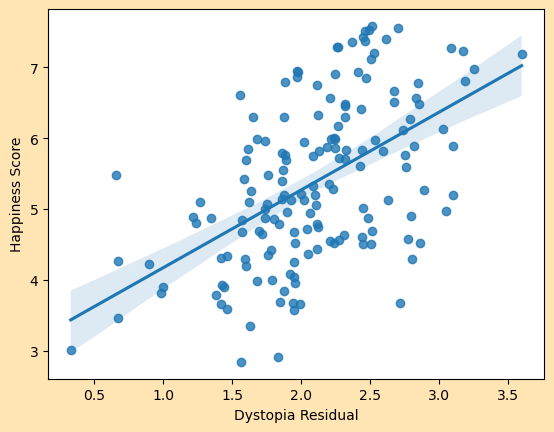

In [27]:
plt.figure(facecolor = '#FFE5B4')
sns.regplot(x='Dystopia Residual', y='Happiness Score', data=df)

By observe the regression plot,
- it shows a positive trend of the regression line which means the Dystopia Residual value increases, the Happiness Score also tends to increase.
- there are many points that are far away from the line which might be outliers in the dataset.
- it shows positive correlation and linear relationship.

<AxesSubplot:xlabel='Happiness Score', ylabel='Health (Life Expectancy)'>

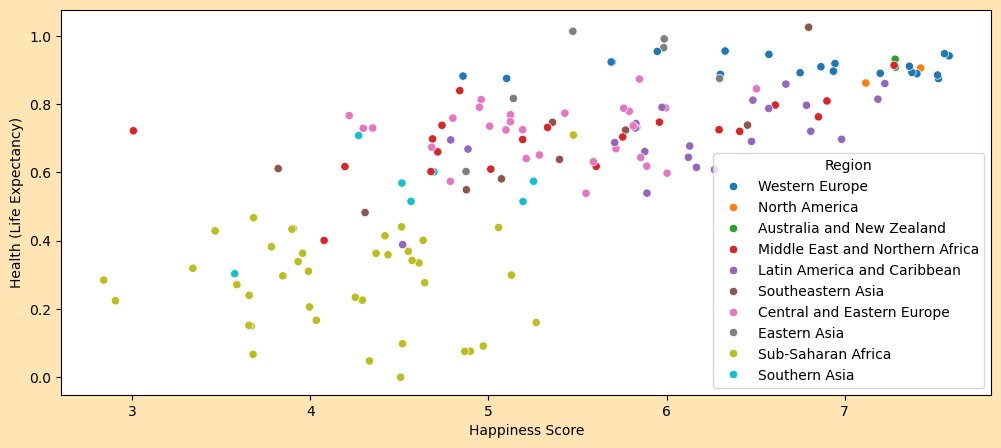

In [28]:
plt.figure(figsize=(12,5),facecolor = '#FFE5B4')
sns.scatterplot(x='Happiness Score', y='Health (Life Expectancy)', data=df, hue='Region')

By observe the scatter plot, 
- it shows the positive trends which means that the Health(Life Expectancy) has increases,the Happiness Score also tends to increase by Region.
- also observe that the Western Europe region has high life expextancy as well as high happiness score compared to others.
- Sub-Saharan region tends to least happiness acore as well as least life expectancy compared to others.

<Figure size 1000x500 with 0 Axes>

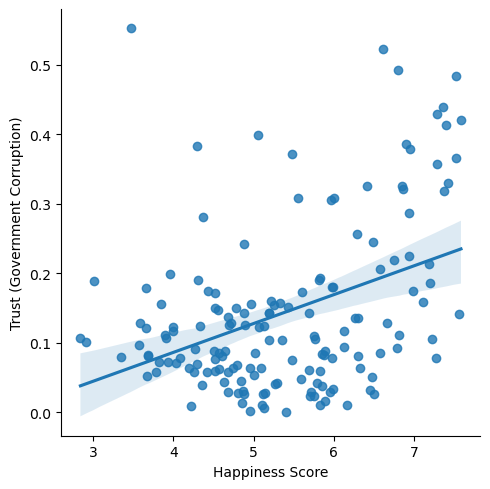

In [29]:
plt.figure(figsize=(10,5),facecolor = '#FFE5B4')
sns.lmplot(x='Happiness Score', y='Trust (Government Corruption)', data=df)

By observe the lmplot,
- it shows a cluster with low corruption and high happiness score value.

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

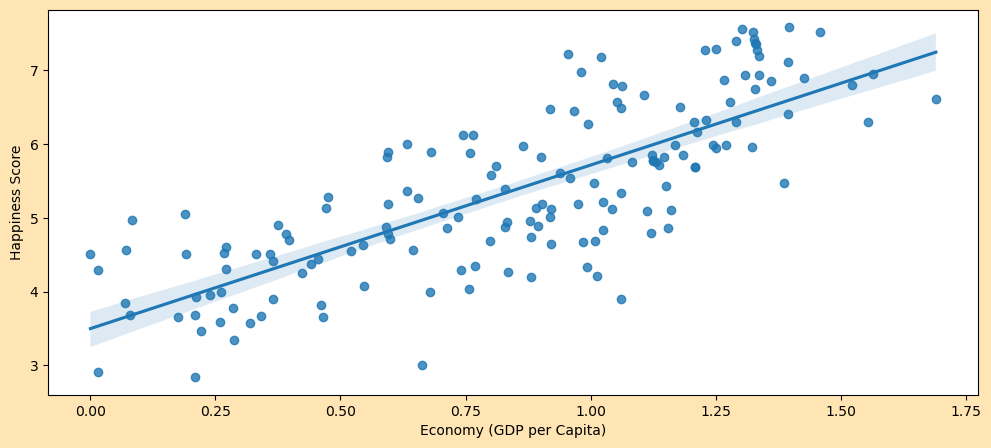

In [30]:
plt.figure(figsize=(12,5),facecolor = '#FFE5B4')
sns.regplot(y='Happiness Score', x='Economy (GDP per Capita)', data=df)

By observe the plot,
- it shows a positive slope of regression line which means if gdp per capita will increases then happiness score also tends to increase.
- it has positive correlation and strong linear relationship

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

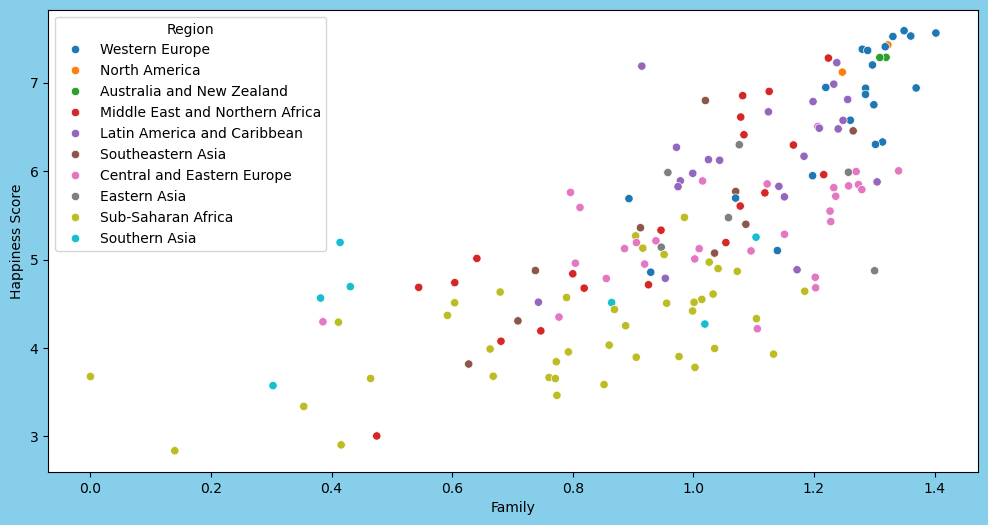

In [31]:
plt.figure(figsize=(12,6),facecolor = '#87CEEB')
sns.scatterplot(y='Happiness Score', x='Family', data=df, hue='Region')

By observe the plot,
- there is positive correlation between family and happiness score.
- likely to see the country of western region has high happiness score with increasing family value compared to other regions.

In [32]:
gdp_region = df.groupby('Region')['Economy (GDP per Capita)'].sum()
gdp_region

Region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: Economy (GDP per Capita), dtype: float64

- we notice that, the 'Central and Eastern Europe' and 'Western Europe' shares the high amount of GDP per capita compared to other region.
- 'Australia and New Zealand' shares the low amount of GDP compared to other region.

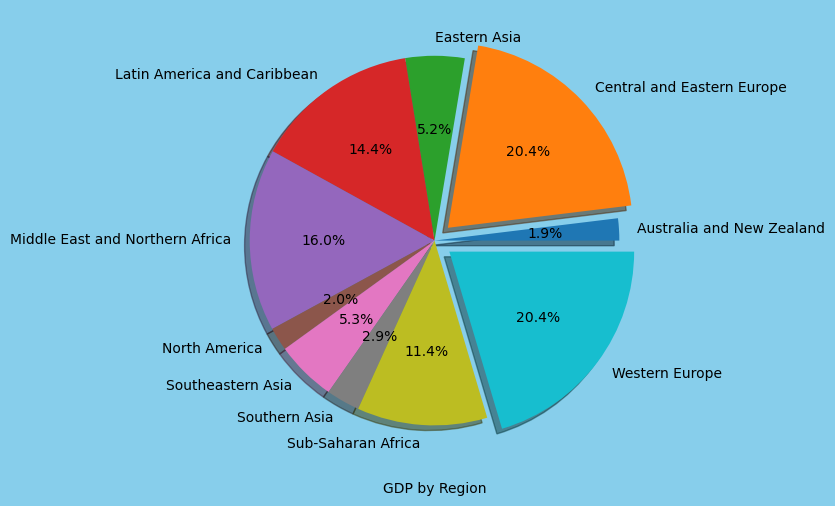

In [33]:
plt.figure(figsize=(11,6),facecolor='#87CEEB')
gdp_region.plot.pie(autopct = '%1.1f%%', explode = (0, .1, 0, 0,0,0,0,0,0,.1), shadow=True)
plt.xlabel('GDP by Region')
plt.ylabel('')
plt.show()

By observe the pie plot,
- 'Central and Eastern Europe' and 'Western Europe' region has a large slice with 20.4%, it indicates that this region contributes a significant portion of  total GDP.
- 'Australia and New Zealand' region has a small slice with 1.9%, it indicates that this region contributes low portion of Total GDP.

In [34]:
health = df.groupby('Region')['Health (Life Expectancy)'].mean()
health

Region
Australia and New Zealand          0.919965
Central and Eastern Europe         0.718774
Eastern Asia                       0.877388
Latin America and Caribbean        0.703870
Middle East and Northern Africa    0.705615
North America                      0.883710
Southeastern Asia                  0.677357
Southern Asia                      0.540830
Sub-Saharan Africa                 0.282332
Western Europe                     0.909148
Name: Health (Life Expectancy), dtype: float64

- we notice that the 'Australia and New Zealand' and 'Western Europe' has higher average life expectancy compared to other region.
- the 'Sub-Saharan Africa' has lower average life expectancy compared to other regions.

Text(0.5, 1.0, 'Life Expectancy by Region')

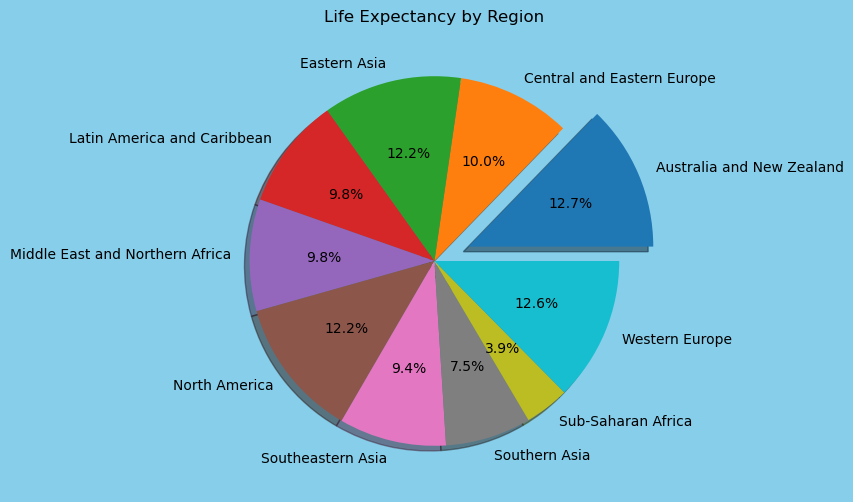

In [35]:
plt.figure(figsize=(11,6),facecolor = '#87CEEB')
health.plot.pie(autopct = '%1.1f%%',explode = (.2,0,0,0,0,0,0,0,0,0), shadow=True)
plt.ylabel('')
plt.title('Life Expectancy by Region')

In [36]:
df.groupby('Region')['Trust (Government Corruption)'].mean()

Region
Australia and New Zealand          0.392795
Central and Eastern Europe         0.086674
Eastern Asia                       0.127695
Latin America and Caribbean        0.117172
Middle East and Northern Africa    0.181702
North America                      0.244235
Southeastern Asia                  0.151276
Southern Asia                      0.102536
Sub-Saharan Africa                 0.123878
Western Europe                     0.231463
Name: Trust (Government Corruption), dtype: float64

Text(0.5, 1.0, 'Corruption by Region')

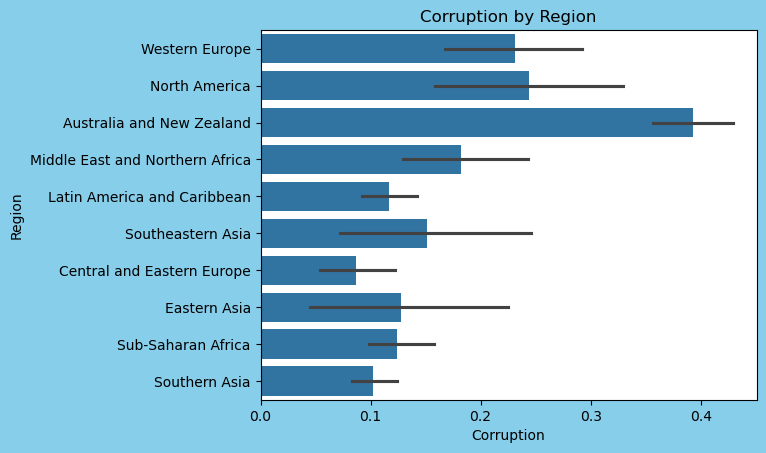

In [37]:
plt.figure(facecolor='#87CEEB')
sns.barplot(x='Trust (Government Corruption)', y ='Region', data=df)
plt.xlabel('Corruption')
plt.ylabel('Region')
plt.title('Corruption by Region')

By observe the bar plot,
- we notice that 'Australia and New Zealand' has high average corruption rate compared to other regions.
- the 'Central and Eastern Europe' has low average corrution rate compared to other region.

In [38]:
df.groupby('Region')['Freedom'].mean()

Region
Australia and New Zealand          0.645310
Central and Eastern Europe         0.358269
Eastern Asia                       0.462490
Latin America and Caribbean        0.501740
Middle East and Northern Africa    0.361751
North America                      0.589505
Southeastern Asia                  0.557104
Southern Asia                      0.373337
Sub-Saharan Africa                 0.365944
Western Europe                     0.549926
Name: Freedom, dtype: float64

Text(0.5, 1.0, 'Happiness by Freedom')

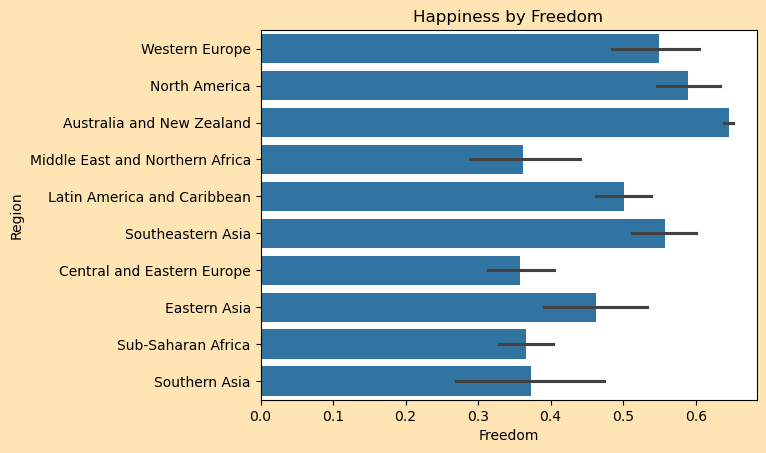

In [39]:
plt.figure(facecolor='#FFE5B4')
sns.barplot(x='Freedom', y ='Region', data=df)
plt.xlabel('Freedom')
plt.ylabel('Region')
plt.title('Happiness by Freedom')

By observe bar plot,
- we notice that 'Australia and New Zealand' region has higher proportion level of freedom compared to other regions.
- the 'Central and Eastern Europe' region has lower proportion level of freedom compared to other regions.

In [40]:
df.groupby('Region')[['Freedom']].mean()

,Freedom
Region,
Australia and New Zealand,0.645310
Central and Eastern Europe,0.358269
Eastern Asia,0.462490
Latin America and Caribbean,0.501740
Middle East and Northern Africa,0.361751
North America,0.589505
Southeastern Asia,0.557104
Southern Asia,0.373337
Sub-Saharan Africa,0.365944


Text(0.5, 1.0, 'Freedom by Region')

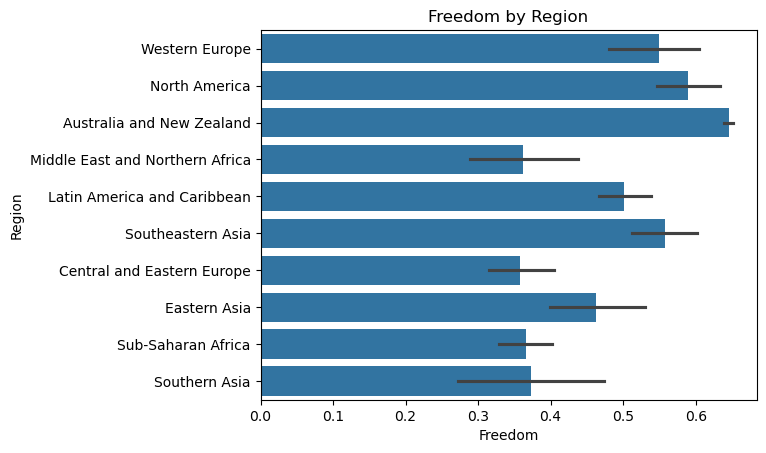

In [41]:
sns.barplot(x='Freedom', y ='Region', data=df)
plt.xlabel('Freedom')
plt.ylabel('Region')
plt.title('Freedom by Region')

Multi-variate Analysis

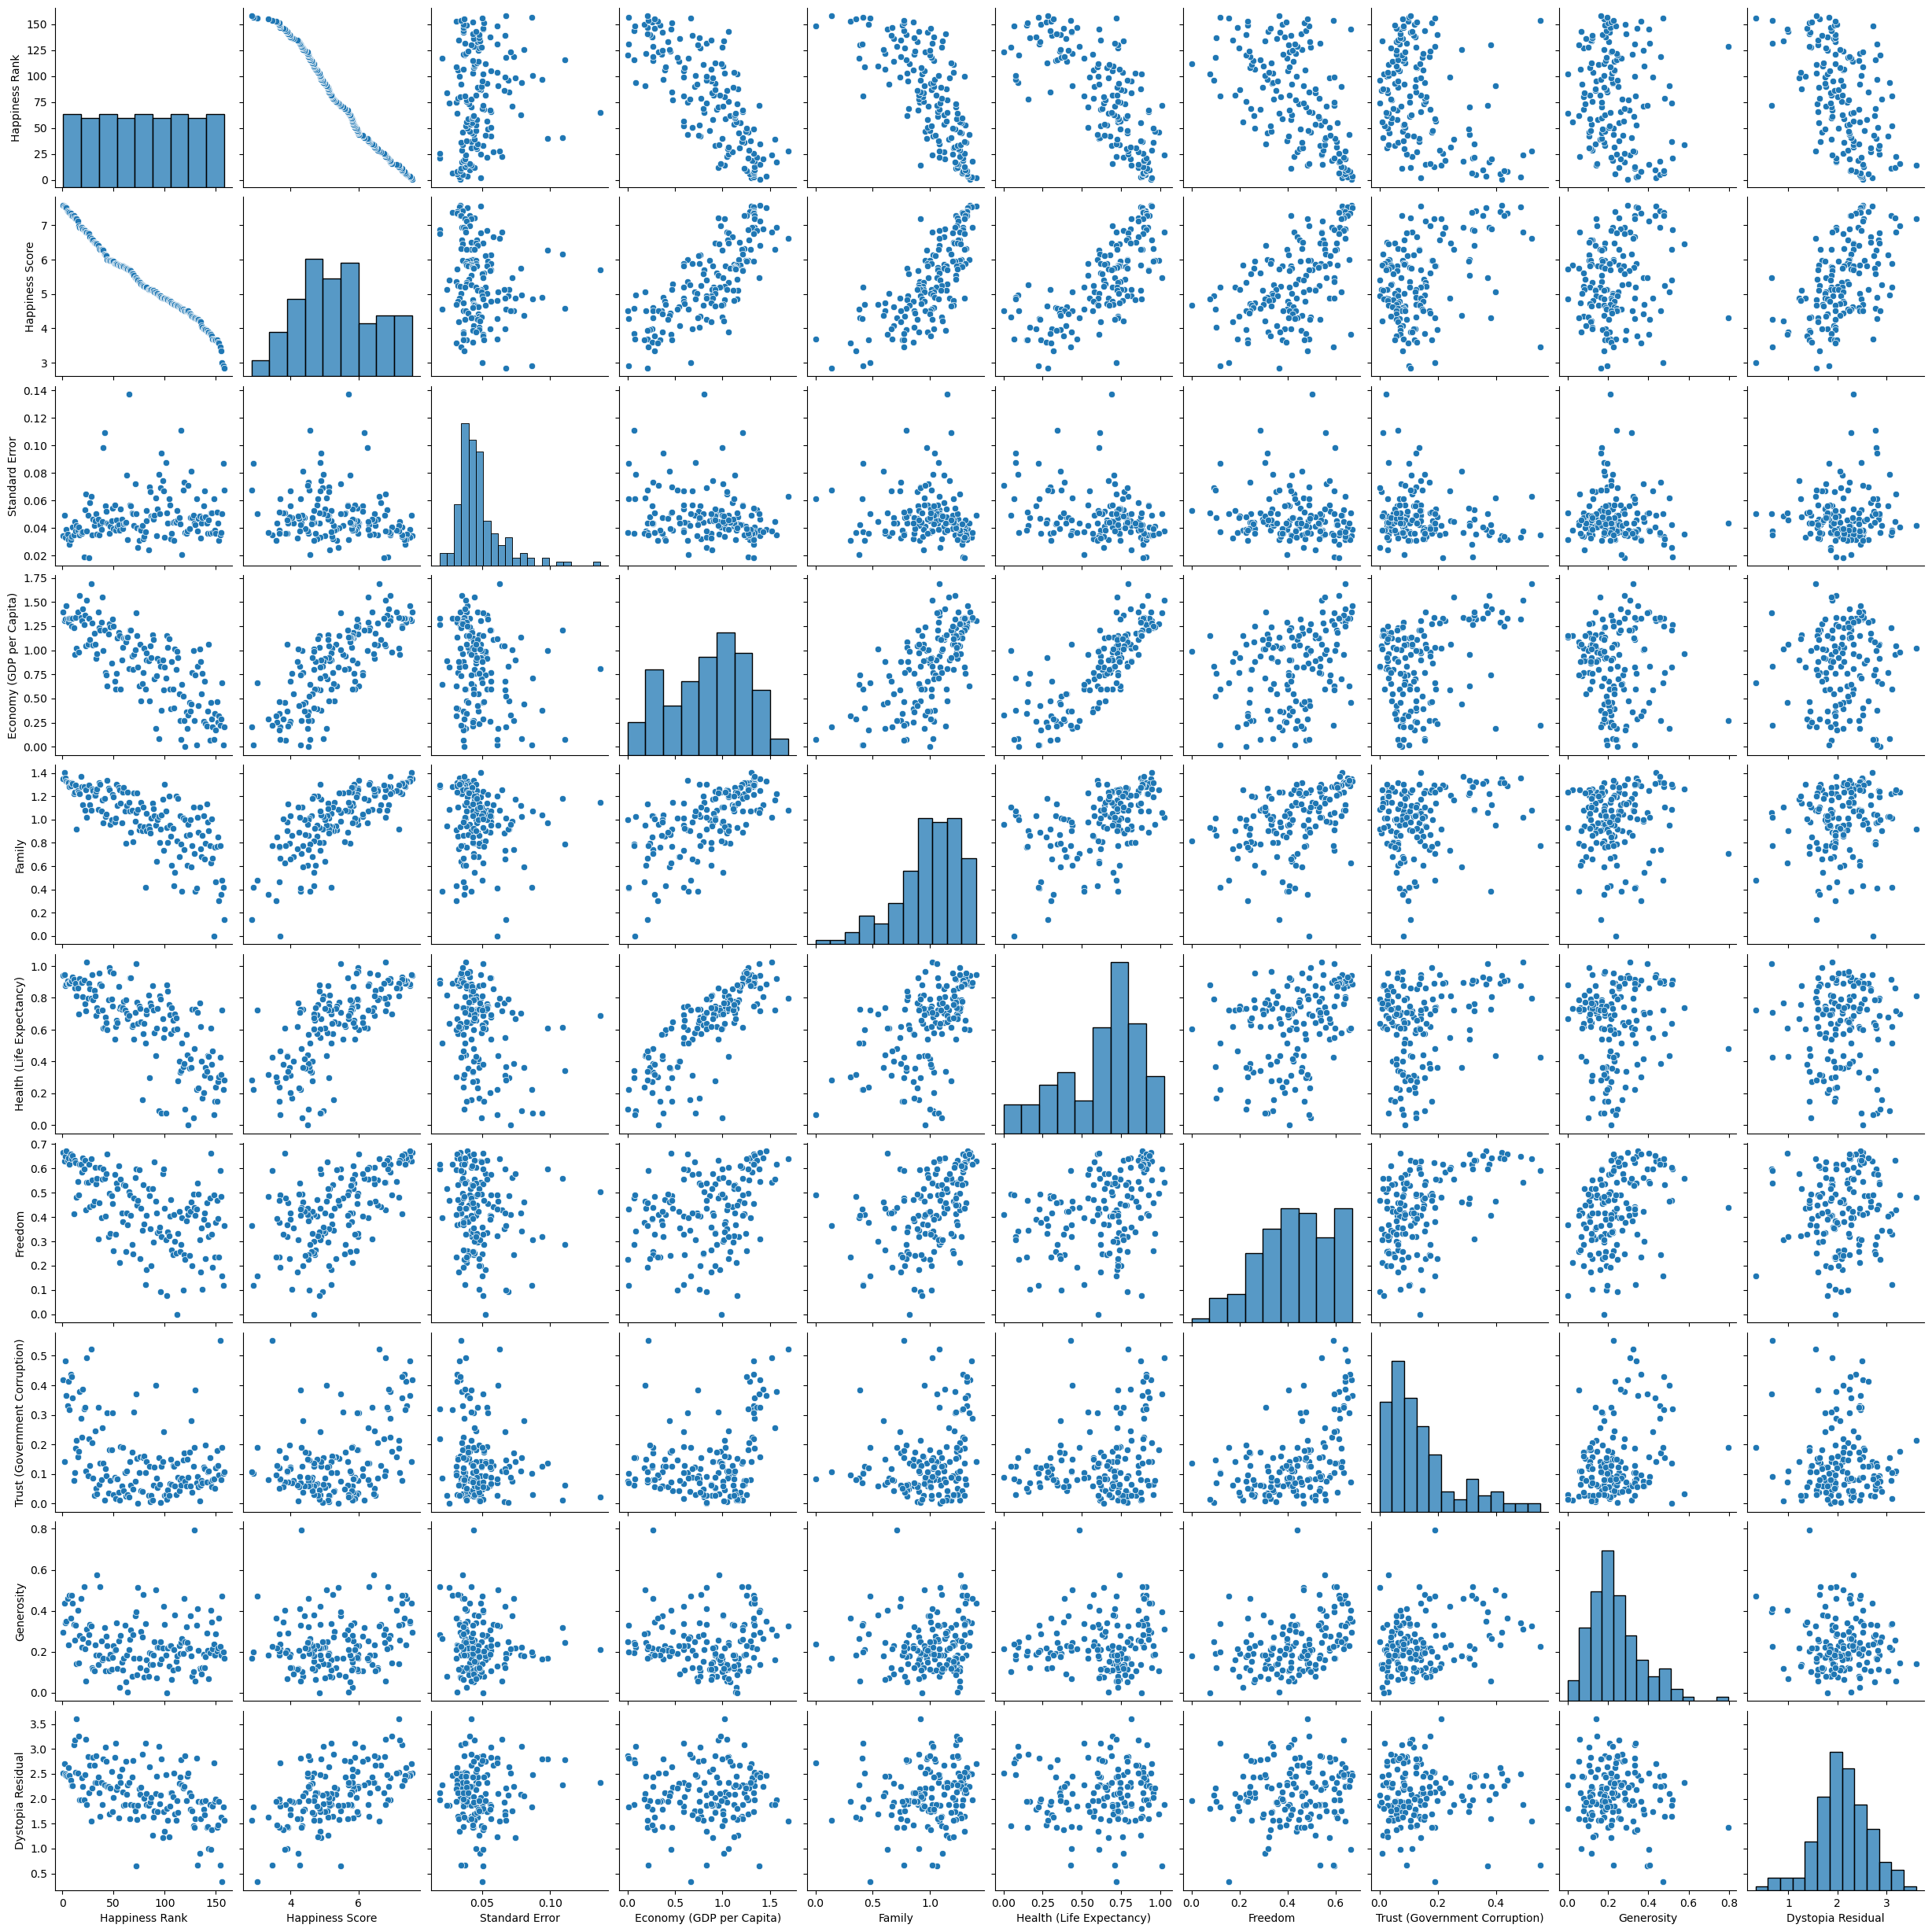

In [42]:
sns.pairplot(df)

By observe the pairplot,
- the Economy(GDP per capita), Family, Health, Freedom and Dystopia Residual has strong linear relationship with happiness score.
- Economy(GDP per capita) is positively correlate with Health and Family,has a strong linear relation.
- the 'Happiness Rank' is inversely related to 'Happiness Score' which means a high Happiness Score corresponds to a low (better) Happiness Rank.
- Now I can remove the 'Happiness Rank' because it provides redundant information which means does not provide any additional insight to our analysis

In [43]:
df.drop(columns=['Happiness Rank'], inplace=True)

<AxesSubplot:>

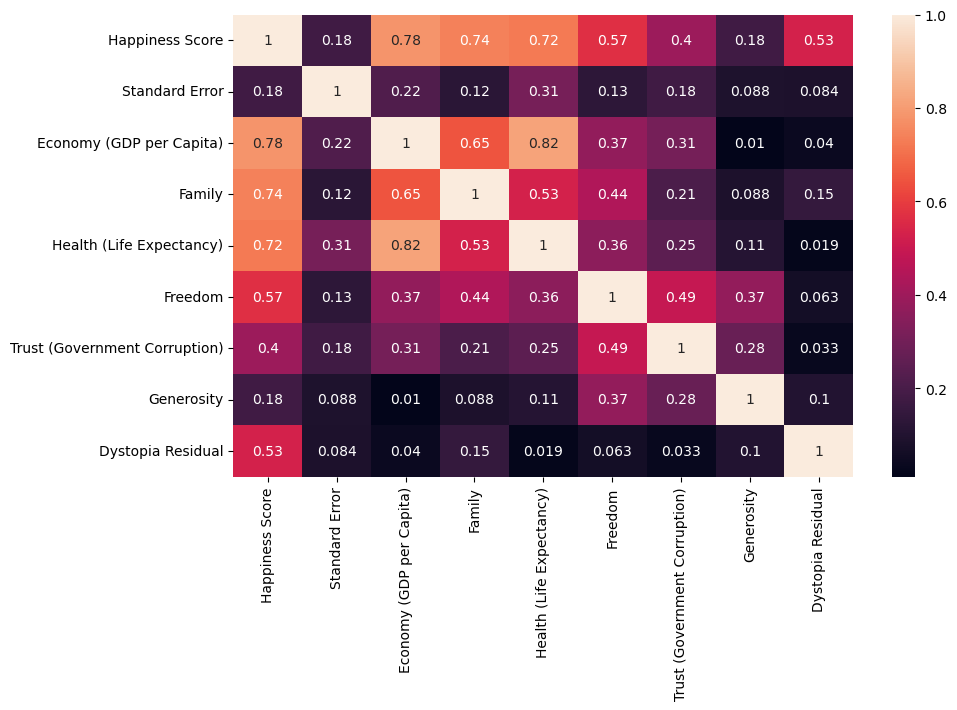

In [44]:
plt.figure(figsize=(10,6))
df_corr = df.corr().abs()
sns.heatmap(df_corr, annot=True, annot_kws={'size':10})

By the Correation Heatmap,
- there is a strong positive correlation between target variable and:
    
    1) Economy(GDP per capita)
    
    2) Family
    
    3) Healthy (life expectancy).
    
    So it significantly impact happiness levels
    
    
- Health is highly correlate with feature variable Economy.

In [45]:
df_corr['Happiness Score'].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Standard Error                   0.177254
Name: Happiness Score, dtype: float64

- Again check the correlation by plotting the graph.

Text(0, 0.5, 'Happiness Score')

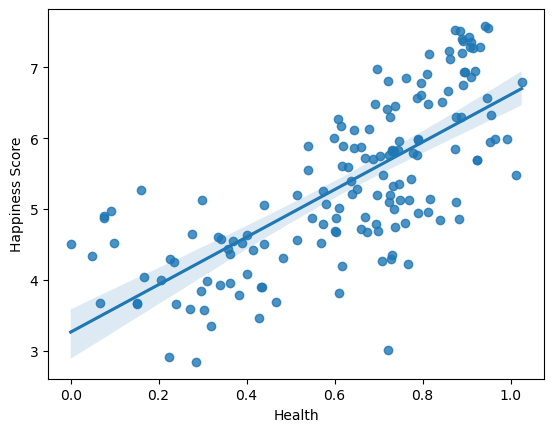

In [46]:
sns.regplot(x='Health (Life Expectancy)', y='Happiness Score', data=df)
plt.xlabel('Health')
plt.ylabel('Happiness Score')

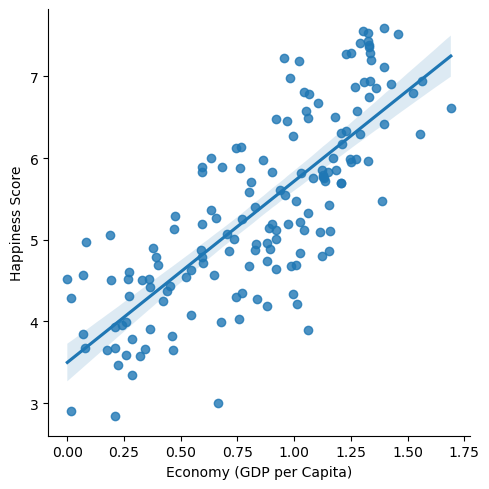

In [47]:
sns.lmplot(x = 'Economy (GDP per Capita)', y = 'Happiness Score', data=df)

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Economy (GDP per Capita)'>

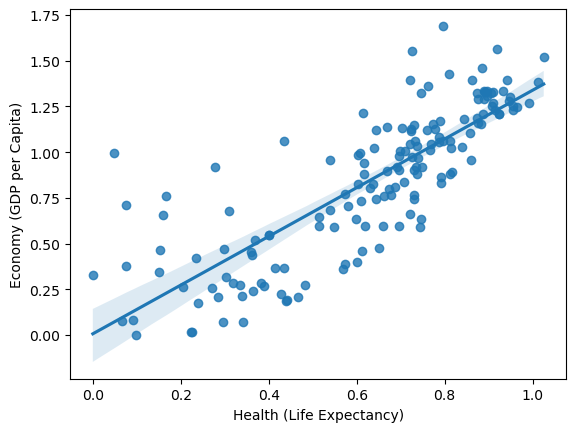

In [48]:
sns.regplot(x ='Health (Life Expectancy)', y='Economy (GDP per Capita)', data=df )

# Check Outliers

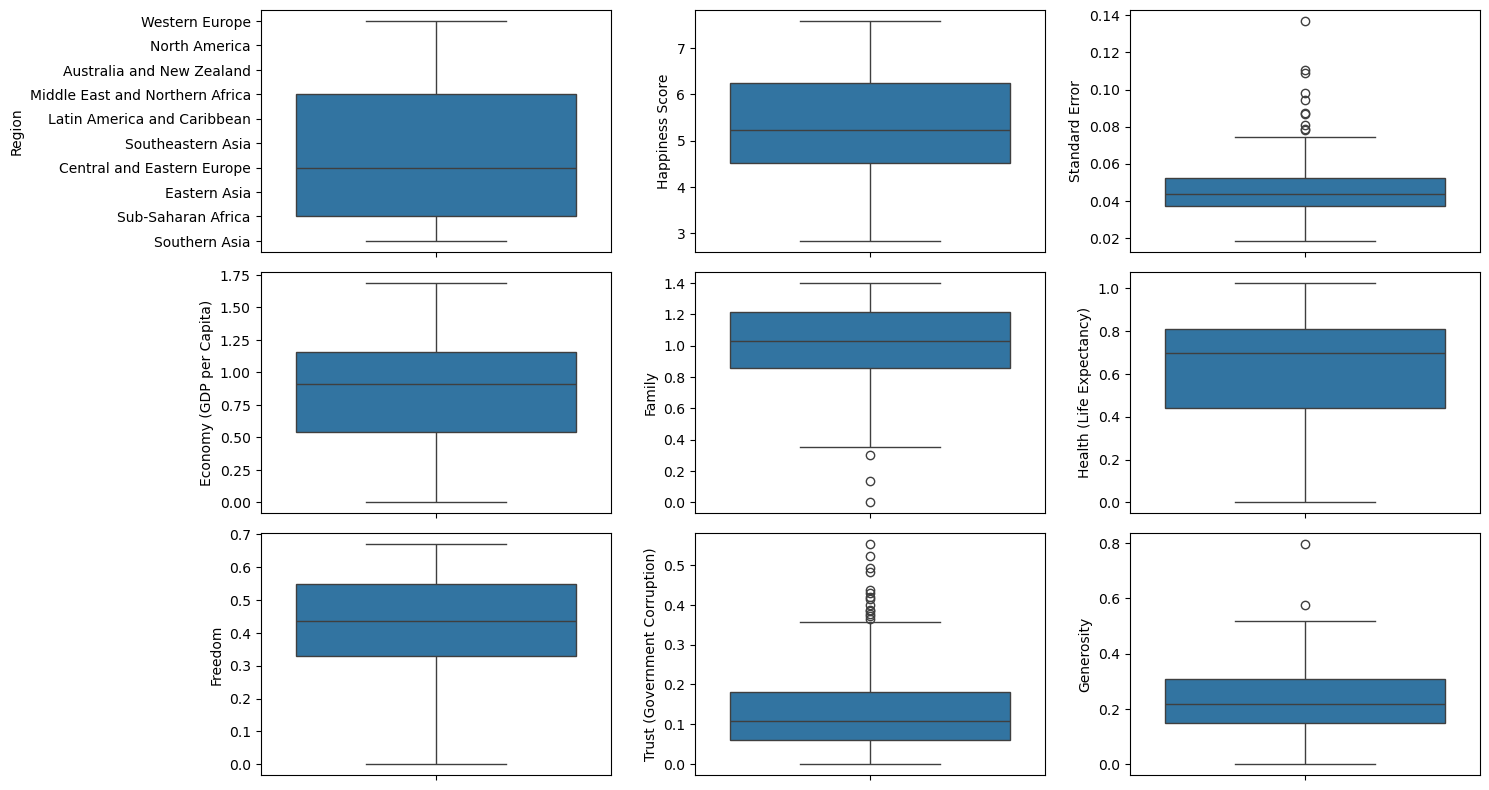

In [49]:
plt.figure(figsize=(15,8))
p = 1
for i in df.columns:
    if p <= 9:
        ax = plt.subplot(3,3,p)
        sns.boxplot(df[i])
    p +=1
plt.tight_layout()    

- Here in box plot we can say that there are outliers present in the dataset, but we have only 158 instances to train the model, we cannot lose the data from dataset. So we won't delete the outliers as of now.

# Encode the categorical variable

In [50]:
le = LabelEncoder()
for col in cat_col:
    df[col] = le.fit_transform(df[col].values.reshape(-1,1))
df.head()    

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,
Switzerland,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
Denmark,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Canada,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# Divide the feature and target variable into X and y

In [51]:
X = df.drop('Happiness Score', axis=1)
y = df['Happiness Score']

# Apply Scaling technique to scale the value to avoid biasness

In [52]:
sc = MinMaxScaler()
x = pd.DataFrame(sc.fit_transform(X), columns=X.columns)

In [53]:
x

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.000000,0.131954,0.826132,0.962403,0.918244,0.993789,0.760595,0.372895,0.668630
1,1.000000,0.256311,0.770412,1.000000,0.924496,0.938841,0.256292,0.548198,0.725030
2,1.000000,0.124947,0.784113,0.970297,0.853099,0.969615,0.876175,0.428947,0.660889
3,1.000000,0.171549,0.863099,0.949167,0.863409,1.000000,0.661394,0.435983,0.652724
4,0.555556,0.143943,0.784592,0.943219,0.883326,0.945112,0.597144,0.575602,0.648584
...,...,...,...,...,...,...,...,...,...
153,0.888889,0.136429,0.131376,0.551764,0.418083,0.883953,1.000000,0.284314,0.104425
154,0.888889,0.152638,0.169573,0.252355,0.311241,0.723426,0.145132,0.229432,0.398557
155,0.444444,0.267370,0.392329,0.338668,0.704150,0.234184,0.342556,0.592790,0.000000
156,0.888889,0.574926,0.009051,0.296578,0.218444,0.176937,0.182312,0.247864,0.459573


# Check Skewness

In [54]:
x.skew()

Region                          -0.116119
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

- We observe that, skewness is present in our data.Therefore we remove the skewness.

In [55]:
x['Standard Error'] = np.sqrt(x['Standard Error'])

In [56]:
x['Family'] = np.square(x['Family'])

In [57]:
x['Health (Life Expectancy)'] = np.square(x['Health (Life Expectancy)'])

In [58]:
x['Trust (Government Corruption)'] = np.sqrt(x['Trust (Government Corruption)'])

In [59]:
x['Generosity'] = np.sqrt(x['Generosity'])

In [60]:
x.skew()

Region                          -0.116119
Standard Error                   0.425212
Economy (GDP per Capita)        -0.317575
Family                          -0.255728
Health (Life Expectancy)        -0.014063
Freedom                         -0.413462
Trust (Government Corruption)    0.507663
Generosity                      -0.130961
Dystopia Residual               -0.238911
dtype: float64

- There is no skew present

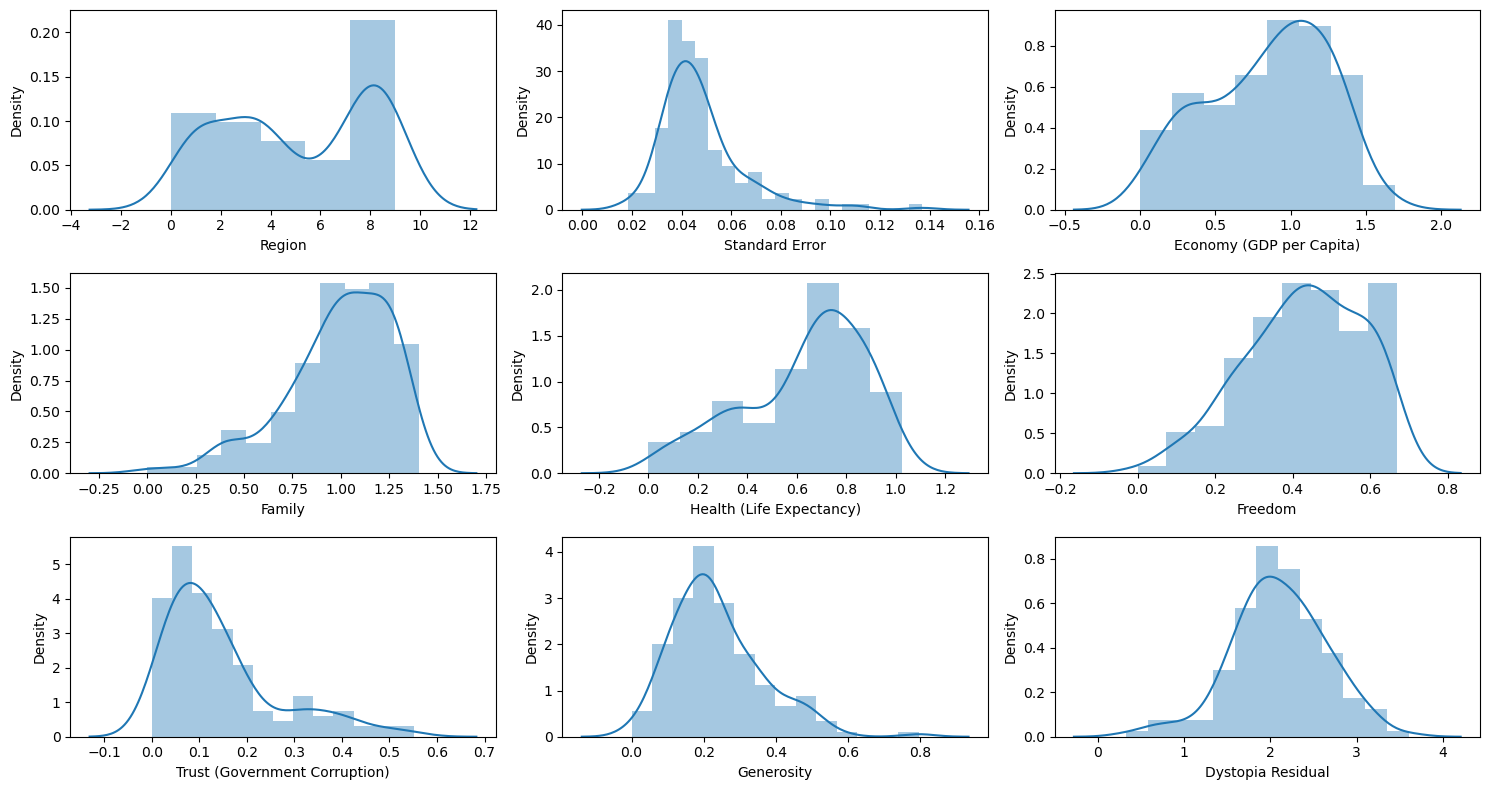

In [61]:
plt.figure(figsize=(15,8))
p = 1
for i in x.columns:
    if p <= 9:
        ax = plt.subplot(3,3,p)
        sns.distplot(df[i])
    p +=1
plt.tight_layout() 

- here all columns are almost normally distributed.

# To check Multicolinearity using VIF value

In [62]:
f = x.columns
d = {'Feature': f}
d['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(f))]
df1 = pd.DataFrame(d)

df1

,Feature,VIF
0,Region,4.774392
1,Standard Error,9.773630
2,Economy (GDP per Capita),23.595411
3,Family,12.848358
4,Health (Life Expectancy),15.095326
5,Freedom,17.158380
6,Trust (Government Corruption),8.867894
7,Generosity,15.889692
8,Dystopia Residual,9.828355


By observe the VIF value,
- the Economy (GDP per capita) is with a high VIF value and it is highly correlated with the target variable and is important for model performance, removing it might lead to loss of predictive power. So we cannot remove or delete this.

In [63]:
x.drop('Freedom',axis=1, inplace=True)

In [64]:
f = x.columns
d = {'Feature': f}
d['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(f))]
df1 = pd.DataFrame(d)

df1

,Feature,VIF
0,Region,4.762830
1,Standard Error,9.767179
2,Economy (GDP per Capita),23.595273
3,Family,11.458916
4,Health (Life Expectancy),15.018247
5,Trust (Government Corruption),7.675851
6,Generosity,14.133471
7,Dystopia Residual,9.808538


In [65]:
x.drop('Generosity',axis=1, inplace=True)

In [66]:
f = x.columns
d = {'Feature': f}
d['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(f))]
df1 = pd.DataFrame(d)

df1

,Feature,VIF
0,Region,4.028435
1,Standard Error,8.211854
2,Economy (GDP per Capita),22.392003
3,Family,11.033509
4,Health (Life Expectancy),13.749811
5,Trust (Government Corruption),6.948822
6,Dystopia Residual,9.733917


# find best random state

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [68]:
param = {
     'random_state': range(0, 200)
}

g = GridSearchCV(RandomForestRegressor(), param, cv=5)
g.fit(x_train,y_train)

print('Best random state : ',g.best_params_['random_state'])

Best random state :  50


# Model Building

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=50)

In [70]:
def metric(reg, x_train, y_train, actual, pred):
    train_aacu = r2_score(reg.predict(x_train),y_train)*100
    test_accu = r2_score(actual,pred)*100
    mse = mean_squared_error(actual,pred)
    mae = mean_absolute_error(actual,pred)
    rmse = np.sqrt(mean_squared_error(actual,pred))
    return train_aacu,test_accu,mse,mae,rmse

In [71]:
def evaluate_cross_val(model, x, y, actual, pred):
    k = KFold(n_splits=5)
    score = cross_val_score(model, x, y, cv=k)
    print("Cross Validation Score : {}".format(score))
    print("Average Cross Validation Score : {}".format(score.mean()))
    print("\n------------------")
    difference = r2_score(actual, pred) - score.mean() 
    return difference

# LinearRegression

In [72]:
lr = LinearRegression()
lr.fit(x_train,y_train)
l_pred = lr.predict(x_test)
lr

LinearRegression()

In [73]:
train_accu, test_accu, mse, mae, rmse = metric(lr, x_train, y_train, y_test, l_pred)
print('\n------------------------------------------')
print("Training Accuracy Score:", train_accu)
print('\n------------------------------------------')
print("Test Accuracy Score:", test_accu)
print('\n------------------------------------------')
print('Mean Squared Error : ', mse)
print('Mean Absolute Error : ', mae)
print('Root Mean Squared Error : ', rmse)


------------------------------------------
Training Accuracy Score: 97.09563485464352

------------------------------------------
Test Accuracy Score: 96.21127888681053

------------------------------------------
Mean Squared Error :  0.05072913921184553
Mean Absolute Error :  0.16632092253759456
Root Mean Squared Error :  0.22523130158094262


In [74]:
# cross validation score
evaluate_cross_val(lr, x, y, y_test, l_pred)

Cross Validation Score : [ 0.71268829 -0.14420364  0.03363707 -0.89088304  0.64182418]
Average Cross Validation Score : 0.0706125724409713

------------------


0.8915002164271341

# DecisionTreeRegressor

In [75]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr_pred = dtr.predict(x_test)
dtr

DecisionTreeRegressor()

In [76]:
train_accu, test_accu, mse, mae, rmse = metric(dtr, x_train, y_train, y_test, dtr_pred)
print('\n------------------------------------------')
print("Training Accuracy Score:", train_accu)
print('\n------------------------------------------')
print("Test Accuracy Score:", test_accu)
print('\n------------------------------------------')
print('Mean Squared Error : ', mse)
print('Mean Absolute Error : ', mae)
print('Root Mean Squared Error : ', rmse)


------------------------------------------
Training Accuracy Score: 100.0

------------------------------------------
Test Accuracy Score: 77.04421426220239

------------------------------------------
Mean Squared Error :  0.3073668437499999
Mean Absolute Error :  0.4474687499999999
Root Mean Squared Error :  0.5544067493726965


In [77]:
# cross validation score
evaluate_cross_val(dtr, x, y, y_test, dtr_pred)

Cross Validation Score : [ -6.70008025  -7.7473511   -9.34173572 -12.09757798  -4.80557055]
Average Cross Validation Score : -8.138463120979104

------------------


8.908905263601127

# RandomForestRegressor

In [78]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
rf

RandomForestRegressor()

In [79]:
train_accu, test_accu, mse, mae, rmse = metric(rf, x_train, y_train, y_test, rf_pred)
print('\n------------------------------------------')
print("Training Accuracy Score:", train_accu)
print('\n------------------------------------------')
print("Test Accuracy Score:", test_accu)
print('\n------------------------------------------')
print('Mean Squared Error : ', mse)
print('Mean Absolute Error : ', mae)
print('Root Mean Squared Error : ', rmse)


------------------------------------------
Training Accuracy Score: 98.35548306374862

------------------------------------------
Test Accuracy Score: 89.67994900557554

------------------------------------------
Mean Squared Error :  0.13818048041250006
Mean Absolute Error :  0.2673568749999994
Root Mean Squared Error :  0.37172635151748395


In [80]:
# cross validation score
evaluate_cross_val(rf, x, y, y_test, rf_pred)

Cross Validation Score : [-7.08327515 -1.38869439 -1.55130161 -2.16771677 -4.69240967]
Average Cross Validation Score : -3.3766795186165353

------------------


4.2734790086722905

# GradientBoostingRegressor

In [81]:
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
gb_pred = gb.predict(x_test)
gb

GradientBoostingRegressor()

In [82]:
train_accu, test_accu, mse, mae, rmse = metric(gb, x_train, y_train, y_test, gb_pred)
print('\n------------------------------------------')
print("Training Accuracy Score:", train_accu)
print('\n------------------------------------------')
print("Test Accuracy Score:", test_accu)
print('\n------------------------------------------')
print('Mean Squared Error : ', mse)
print('Mean Absolute Error : ', mae)
print('Root Mean Squared Error : ', rmse)


------------------------------------------
Training Accuracy Score: 99.79136422474733

------------------------------------------
Test Accuracy Score: 90.5663660056558

------------------------------------------
Mean Squared Error :  0.1263117864512909
Mean Absolute Error :  0.2640583634656135
Root Mean Squared Error :  0.35540369504450975


In [83]:
# cross validation score
evaluate_cross_val(gb, x, y, y_test, gb_pred)

Cross Validation Score : [-3.64412941 -1.76128074 -2.51486198 -3.39958236 -3.27175639]
Average Cross Validation Score : -2.918322174498659

------------------


3.823985834555217

# ExtraTreesRegressor

In [84]:
et = ExtraTreesRegressor()
et.fit(x_train,y_train)
et_pred = et.predict(x_test)
et

ExtraTreesRegressor()

In [85]:
train_accu, test_accu, mse, mae, rmse = metric(et, x_train, y_train, y_test, et_pred)
print('\n------------------------------------------')
print("Training Accuracy Score:", train_accu)
print('\n------------------------------------------')
print("Test Accuracy Score:", test_accu)
print('\n------------------------------------------')
print('Mean Squared Error : ', mse)
print('Mean Absolute Error : ', mae)
print('Root Mean Squared Error : ', rmse)


------------------------------------------
Training Accuracy Score: 100.0

------------------------------------------
Test Accuracy Score: 91.6931454156596

------------------------------------------
Mean Squared Error :  0.11122475633125004
Mean Absolute Error :  0.2381587499999997
Root Mean Squared Error :  0.3335037575968973


In [86]:
# cross validation score
evaluate_cross_val(et, x, y, y_test, et_pred)

Cross Validation Score : [-6.41340684 -0.74182785 -1.62914607 -2.86031239 -4.6761724 ]
Average Cross Validation Score : -3.2641731118140775

------------------


4.181104565970673

# Ridge

In [87]:
r = Ridge()
r.fit(x_train,y_train)
r_pred = r.predict(x_test)
r

Ridge()

In [88]:
train_accu, test_accu, mse, mae, rmse = metric(r, x_train, y_train, y_test, r_pred)
print('\n------------------------------------------')
print("Training Accuracy Score:", train_accu)
print('\n------------------------------------------')
print("Test Accuracy Score:", test_accu)
print('\n------------------------------------------')
print('Mean Squared Error : ', mse)
print('Mean Absolute Error : ', mae)
print('Root Mean Squared Error : ', rmse)


------------------------------------------
Training Accuracy Score: 95.06038555700674

------------------------------------------
Test Accuracy Score: 95.33960486017014

------------------------------------------
Mean Squared Error :  0.06240043190500569
Mean Absolute Error :  0.21034765232651065
Root Mean Squared Error :  0.24980078443632975


In [89]:
# cross validation score
evaluate_cross_val(r, x, y, y_test, r_pred)

Cross Validation Score : [-1.62234551 -0.45587761  0.00546687 -1.06032134 -0.16672583]
Average Cross Validation Score : -0.65996068450759

------------------


1.6133567331092915

# From the difference of both R2 score and cross validation score we can conclude that "Linear Regression" is our best fit and best performing model

In [90]:
param = {
    'fit_intercept' : [True,False],
    'positive' : [True,False],
    'copy_X' : [True,False]
}

In [91]:
gv = GridSearchCV(LinearRegression(), param_grid=param, cv=6)
gv.fit(x_train,y_train)

GridSearchCV(cv=6, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]})

In [92]:
gv.best_params_

{'copy_X': True, 'fit_intercept': True, 'positive': True}

In [93]:
final = LinearRegression(copy_X= True, fit_intercept= True, positive= True)
final.fit(x_train,y_train)
pred = final.predict(x_test)
print('Testing Accuracy : {:.2f} %'.format(round(r2_score(y_test, pred) * 100, 2)))
print('-----------------------------------------------')
print(mean_squared_error(y_test,pred))
print('\n')
print(mean_absolute_error(y_test,pred))

Testing Accuracy : 96.23 %
-----------------------------------------------
0.05047972181437691


0.1656346783444646


# Export Model

In [94]:
import joblib
joblib.dump(final,'World Happiness Prediction.pkl')

['World Happiness Prediction.pkl']

In [95]:
l = joblib.load('World Happiness Prediction.pkl')

In [96]:
pred = l.predict(x_test)

actual = np.array(y_test)

In [97]:
pd.DataFrame({
    'Actual' : actual,
    'Prediction' : pred
})

,Actual,Prediction
0,6.867,6.706743
1,5.716,5.879415
2,4.715,4.955219
3,4.332,4.523771
4,7.200,7.137840
5,5.360,5.188843
6,3.989,3.987836
7,5.192,5.325435
8,6.750,6.753044
9,3.781,3.702662
